### Inspired by dice poker from Witcher 1
### Calculated all the possibilities

In [154]:
import numpy as np
import pandas as pd
NumOfRolls = 1000000
results = pd.DataFrame(0,index=['nothing', 'pair','dpair', 'set', 'FH', 'street', 'sFlash', 'bFlash'],columns=['Sum'])

In [155]:
def check_comb(roll): #checks pair, set, flash, FH and nothing, by 
    result='nothing'
    x=np.copy(roll)
    dist, repeats=np.unique(x, return_counts=True) #returns two arrays first spec-ing values in x, second saying # of repeats of each value 
    if np.all(np.isin([1,2,3,4,5],x)) or np.all(np.isin([6,2,3,4,5],x)): result = 'street'
    elif np.max(repeats)==5: result = 'bFlash'
    elif np.max(repeats)==4: result = 'sFlash'
    elif np.max(repeats)==3: 
        result = 'set'
        rem = np.delete(x, np.where(x==dist[repeats==3]))
        if np.max(np.unique(rem, return_counts=True)[1])==2: result = 'FH'
    elif np.max(repeats)==2:
        result = 'pair'
        if np.sum(repeats==2)==2: result = 'dpair'
    return result

In [156]:
for i in range(NumOfRolls):
    results.loc[check_comb(np.random.randint(1,7,5))]+=1
    if i%int(0.1*NumOfRolls)==0:print(i/NumOfRolls*100, '%')

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


In [157]:
results

,Sum
nothing,61573
pair,463634
dpair,231661
set,153716
FH,38632
street,30824
sFlash,19207
bFlash,753


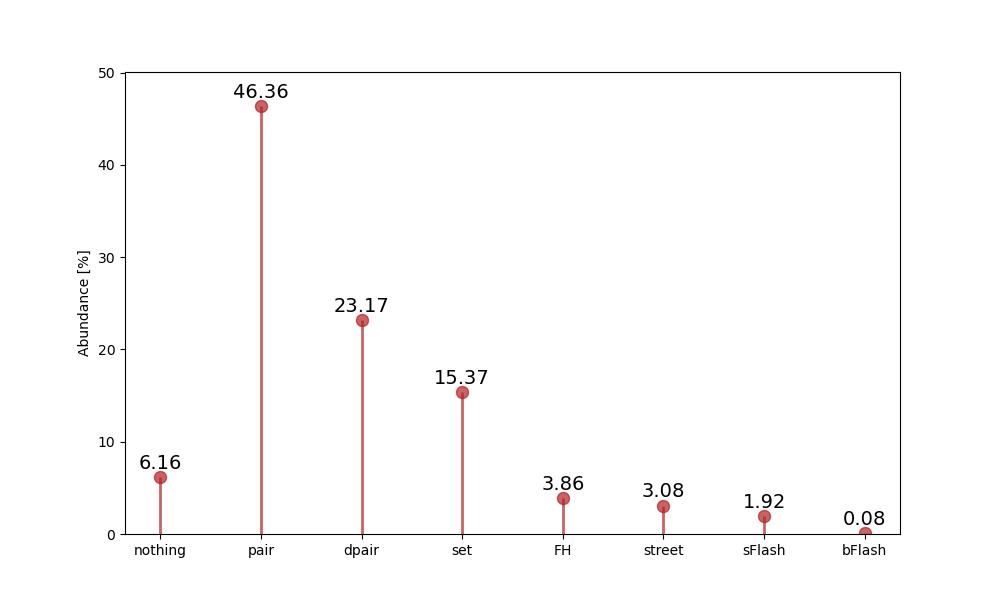

In [167]:
import matplotlib.pyplot as plt
%matplotlib widget

fig, ax = plt.subplots(figsize=(10,6))

ax.vlines(x=results.index, ymin=0, ymax=results.Sum/1e4, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=results.index, y=results.values/1e4, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_ylabel('Abundance [%]')
ax.set_xticks(results.index)
#ax.set_xticklabels(results.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 1.08*results.max(0).values/1e4)

# Annotate
for row in results.itertuples():
    ax.text(row.Index, row.Sum/1e4+.5, s=round(row.Sum/1e4, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()


### 6 hodu kostkou

In [169]:
kolikhodu=3
vysl=pd.DataFrame(0,index=np.arange(kolikhodu+1), columns=['jedna', 'dvojka', 'trojka', 'ctyrka', 'petka', 'sestka']) #index oznacuje pocet, columns 
NumOfRolls=1000000
arr=np.copy(vysl.values)
for i in range(NumOfRolls):
    roll=np.random.randint(1,7,kolikhodu)
    vy, dist = np.unique(roll, return_counts=True)# [dvojka, ctyrka,petka] [1,2,3]
    arr[dist,vy-1]+=1
    dif=np.setdiff1d([1,2,3,4,5,6], vy)
    if len(dif)!=0:
        arr[0,dif-1]+=1
    if i%int(0.1*NumOfRolls)==0:print(int(i/NumOfRolls*100),'%')
vysl[vysl.columns]=arr

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


In [171]:
vysl[vysl.columns]/1e6

,jedna,dvojka,trojka,ctyrka,petka,sestka
0,0.578515,0.578058,0.578506,0.579173,0.578786,0.579252
1,0.347540,0.347550,0.347639,0.346651,0.347183,0.346647
2,0.069365,0.069718,0.069149,0.069452,0.069512,0.069514
3,0.004580,0.004674,0.004706,0.004724,0.004519,0.004587


In [ ]:
vysle=pd.DataFrame(0,index=[0,1,2,3,4,5,6], columns=['jedna', 'dvojka', 'trojka', 'ctyrka', 'petka', 'sestka']) #index oznacuje pocet, columns 
roll=np.random.randint(1,7,6000000)
arrs=np.copy(vysle.values)
for i in range(int(6e6/6)):
    vy, dist = np.unique(roll[6*i:6*(i+1)], return_counts=True)# [dvojka, ctyrka,petka] [1,2,3]
    arrs[dist,vy-1]+=1
    dif=np.setdiff1d([1,2,3,4,5,6], vy)
    if len(dif)!=0:
        arrs[0,dif-1]+=1
    if i%int(0.1*(6e6/6))==0:print(int(i/(6e6/6)*100),'%')
vysle[vysle.columns]=arrs

0 %
9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
109 %
119 %
129 %
139 %
149 %
159 %
169 %
179 %
189 %
199 %
209 %
219 %
229 %
239 %
249 %
259 %
269 %
279 %
289 %
299 %
309 %
319 %
329 %
339 %
349 %
359 %
369 %
379 %
389 %
399 %
409 %
419 %
429 %
439 %
449 %
459 %
469 %
479 %
489 %
499 %
509 %
519 %
529 %
539 %
549 %
559 %
569 %
579 %
589 %
599 %


In [ ]:
vysl

,jedna,dvojka,trojka,ctyrka,petka,sestka
0,334682,335265,335211,334604,334575,334025
1,403006,401364,401129,402771,402689,402221
2,200250,200907,200999,200661,200885,201083
3,53284,53854,53990,53269,53154,54061
4,8108,7912,7963,8046,8076,7910
5,654,673,689,633,598,675
6,16,25,19,16,23,25


In [ ]:
vysle

,jedna,dvojka,trojka,ctyrka,petka,sestka
0,334161,335616,334624,335692,334916,334717
1,402167,401469,401789,401750,401733,401579
2,201549,200581,201276,200546,201106,200946
3,53375,53721,53673,53372,53538,53996
4,8070,7963,8038,7967,8045,8113
5,658,629,576,645,644,624
6,20,21,24,28,18,25
